# File to plot sims fields

In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def read_fields(dir,time):
    dt = np.loadtxt( dir + '/' + time + '/particles.dat' )

    x= dt[:,0]
    y= dt[:,1]
    r= np.sqrt( x**2 + y**2)
    vol= dt[:,3]
    w= dt[:,4]
    p= dt[:,9]
    ux=dt[:,5]
    uy=dt[:,6]
    I=dt[:,11]
    u = np.sqrt( ux**2 + uy**2)
    
    return r, p, u , vol , I


In [20]:
def vels_G_1( x ) :
    l = 0.2
    
    if x > 2*l :
        return 0
    
    if x > l :
        return 1- ( x - l) / l

    return x / l


vels_G = np.vectorize( vels_G_1 ,  otypes=[np.float])

In [84]:
def press_G_1( r ) :
    l = 0.2
    
    x = r/l

    if x > 2 :
        return 0
    
    if x > 1 :
        return 4*np.log( x / 2) - 4 * ( x - 2 ) + 0.5 * ( x**2 - 4)

    return -4*np.log(2) + 2.5  + (x**2 - 1 )


press_G = np.vectorize( press_G_1 ,  otypes=[np.float])

In [90]:
#dir = 'dG_no_p_N400'
dir = 'dG_N400'

r, p, u , vol , I =  read_fields( dir , '252')

In [91]:
r1, p1, u1 , vol , I =  read_fields( dir , '1')

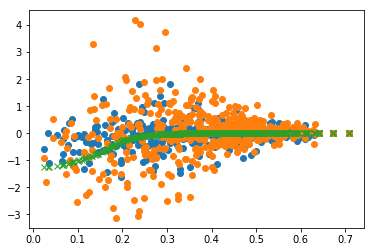

In [92]:
plt.plot( r , p, 'o' , r1 , p1 , 'o' , r , press_G( r ), 'x')

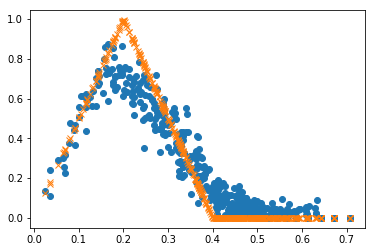

In [63]:
plt.plot( r , u, 'o' , r , vels_G( r ), 'x')

In [69]:
traj = np.loadtxt( dir + '/traj.dat' )

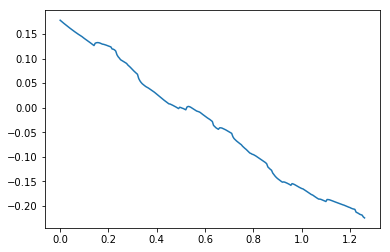

In [70]:
plt.plot( traj[:,0] , traj[:,1])

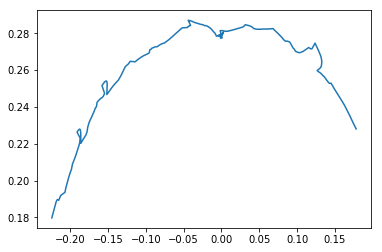

In [71]:
plt.plot( traj[:,1] , traj[:,2])

In [93]:
dir = 'p_N400'

r, p, u , vol , I =  read_fields( dir , '160')

In [101]:
r1, p1, u1 , vol , I =  read_fields( dir , '4')

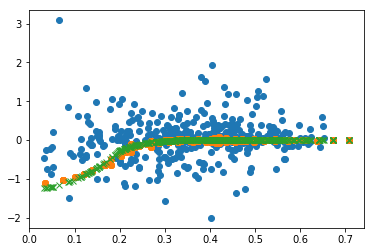

In [102]:
plt.plot( r , p, 'o' , r1 , p1 , 'o' , r , press_G( r ), 'x')

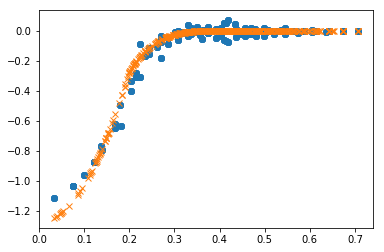

In [103]:
plt.plot( r1 , p1 , 'o' , r , press_G( r ), 'x')